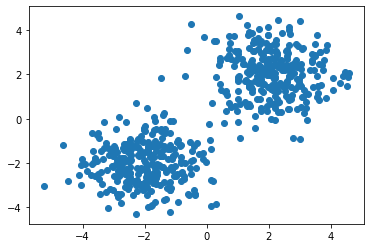

In [36]:
from utils import plot_svm_margins
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

blobs = make_blobs([300, 300], 2, centers = [(-2,-2), (2,2)], random_state=42)[0]
plt.scatter(blobs[:,0], blobs[:,1])

## Clustering
- K-means algorithm
- unsupervised learning algorithm

In [37]:
from sklearn.cluster import KMeans

kmean = KMeans(2)
kmean.fit(blobs)
blobs = np.c_[blobs, kmean.predict(blobs)]
blobs

array([[-1.77590752, -1.9874076 ,  1.        ],
       [ 1.9803622 ,  2.55248995,  0.        ],
       [-2.81822068,  0.09238728,  1.        ],
       ...,
       [ 4.40341559,  1.9423812 ,  0.        ],
       [ 0.65181458,  2.74326409,  0.        ],
       [ 1.07676675,  0.64831539,  0.        ]])

<AxesSubplot:xlabel='X1', ylabel='X2'>

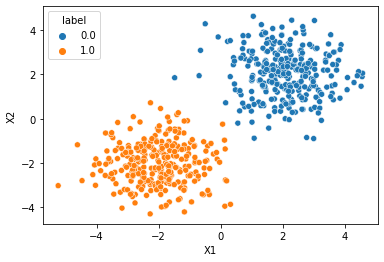

In [40]:
df_blobs = pd.DataFrame(blobs, columns = ["X1", "X2", "label"])
sns.scatterplot(data=df_blobs, x="X1", y="X2", hue = "label")

In [45]:
X, y = df_blobs.drop("label", axis=1).to_numpy(), df_blobs["label"].to_numpy()
X, y

(array([[-1.77590752, -1.9874076 ],
        [ 1.9803622 ,  2.55248995],
        [-2.81822068,  0.09238728],
        ...,
        [ 4.40341559,  1.9423812 ],
        [ 0.65181458,  2.74326409],
        [ 1.07676675,  0.64831539]]),
 array([1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
        0

## SVM
- S = Support
- V = Vector
- M = Machine

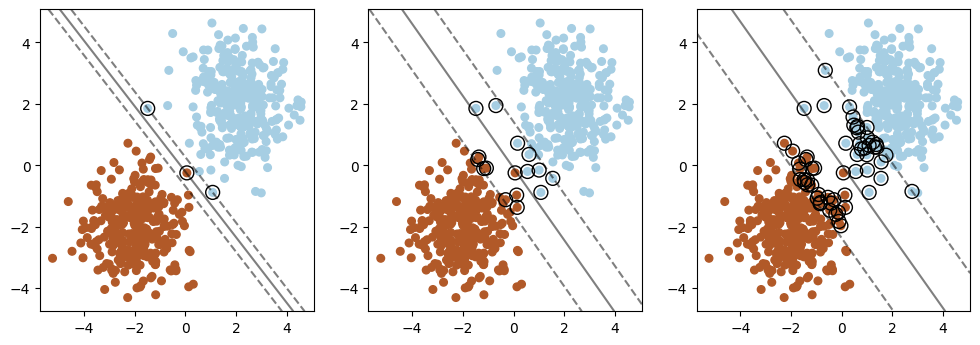

In [47]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize = (12, 4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel= "linear", C = C)
    plot_svm_margins(classifier, X, y)